# EllipticEnvelope

- As EllipticEnvelope fits a hypothetical Gaussian distribution, leveraging parametric and statistical assumption,

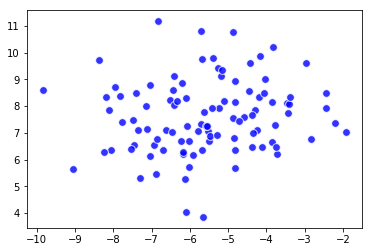

In [4]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

blobs = 1
blob = make_blobs(n_samples=100, n_features=2, centers=blobs,
cluster_std=1.5, shuffle=True, random_state=5)
# Robust Covariance Estimate

from sklearn.covariance import EllipticEnvelope
robust_covariance_est = EllipticEnvelope(contamination=.1).fit(blob[0])
detection = robust_covariance_est.predict(blob[0])
outliers = np.where(detection==-1)[0]
inliers = np.where(detection==1)[0]

# Draw the distribution and the detected outliers

# Just the distribution
plt.scatter(blob[0][:,0],blob[0][:,1], c='blue', alpha=0.8,s=60, marker='o', edgecolors='white')
plt.show()


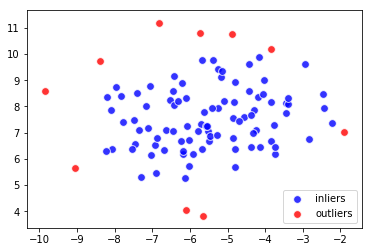

In [3]:

# The distribution and the outliers
in_points = plt.scatter(blob[0][inliers,0],blob[0][inliers,1],c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
out_points = plt.scatter(blob[0][outliers,0],blob[0][outliers,1],c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('inliers','outliers'),
scatterpoints=1, loc='lower right')
plt.show()

## Boston house price dataset

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()

In [9]:
import numpy as np
from sklearn import preprocessing

normalized_data = preprocessing.StandardScaler().fit_transform(boston.data [:,continuous_variables])
outliers_rows, outliers_columns = np.where(np.abs(normalized_data)>3)

In [10]:
from sklearn.decomposition import PCA
# Normalized data relative to continuous variables
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data [:,continuous_variables])

# Just for visualization purposes pick the first 2 PCA components
pca = PCA(n_components=2)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3)) 
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))


In [12]:
# Robust Covariance Estimate
robust_covariance_est = EllipticEnvelope(store_precision=False,assume_centered = False, contamination=.05)
robust_covariance_est.fit(normalized_data)
detection = robust_covariance_est.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)


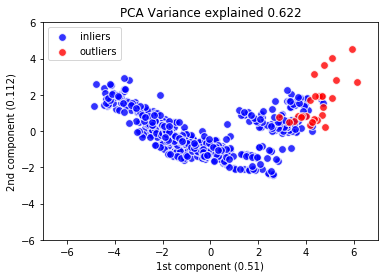

In [13]:
# Draw the distribution and the detected outliers
from matplotlib import pyplot as plt
in_points = plt.scatter(Zscore_components[regular,0],Zscore_components[regular,1], 
                        c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')

out_points = plt.scatter(Zscore_components[outliers,0],Zscore_components[outliers,1], c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('inliers','outliers'), scatterpoints=1,loc='best')
plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.title(vtot)
plt.show()

## OneClassSVM

In [14]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm

In [15]:
# Normalized data relative to continuous variables
continuous_variables = [n for n in range(boston.data.shape[1]) if n!=3]
normalized_data = preprocessing.StandardScaler().fit_transform(boston.data[:,continuous_variables])

# Just for visualization purposes pick the first 5 PCA components
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(normalized_data)
vtot = 'PCA Variance explained ' +str(round(np.sum(pca.explained_variance_ratio_),3))

# OneClassSVM fitting and estimates
outliers_fraction = 0.02 #
nu_estimate = 0.95 * outliers_fraction + 0.05
machine_learning = svm.OneClassSVM(kernel="rbf",gamma=1.0/len(normalized_data), degree=3, nu=nu_estimate)
machine_learning.fit(normalized_data)
detection = machine_learning.predict(normalized_data)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

#### Draw the distribution and the detected outliers

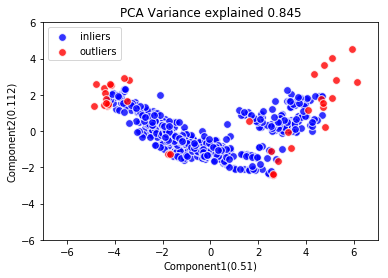

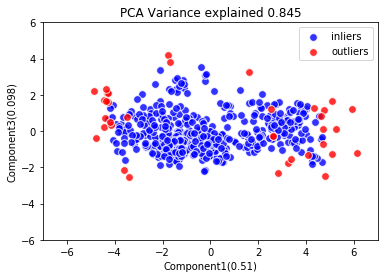

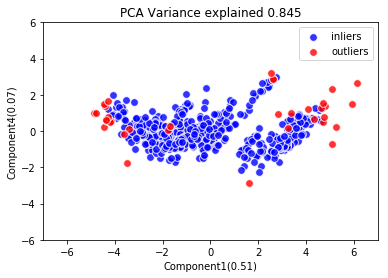

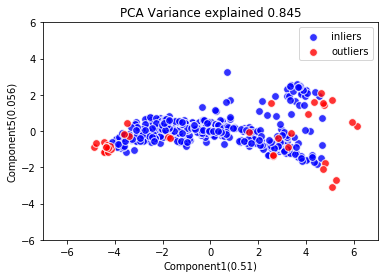

In [16]:
from matplotlib import pyplot as plt
for r in range(1,5):
    in_points = plt.scatter(Zscore_components[regular,0],
    Zscore_components[regular,r], c='blue', alpha=0.8, s=60,  marker='o', edgecolors='white')
    out_points = plt.scatter(Zscore_components[outliers,0], 
                             Zscore_components[outliers,r], c='red', alpha=0.8, s=60,    
                             marker='o', edgecolors='white')
    
    plt.legend((in_points,out_points),('inliers','outliers'),scatterpoints=1, loc='best')
    plt.xlabel('Component1('+str(round(pca.explained_variance_ratio_[0],3))+')')
    plt.ylabel('Component'+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r], 3))+')')
    plt.xlim([-7,7])
    plt.ylim([-6,6])
    plt.title(vtot)
    plt.show()